# 鄰近成分分析(Neighborhood Component Analysis)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from tqdm.notebook import tqdm
from random import choices

# MNIST Dataset

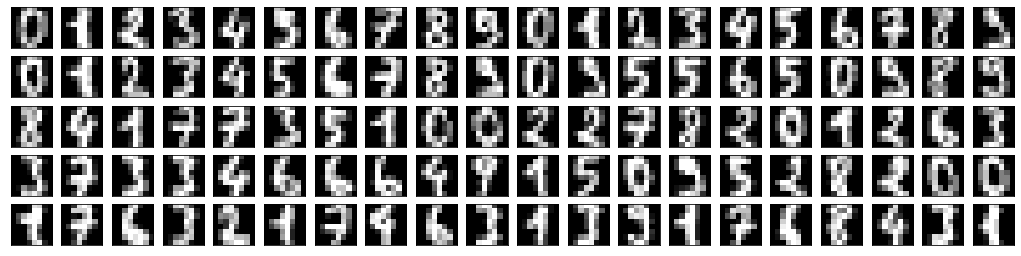

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
x=digits.data/16
y=digits.target
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 

# Data Information

In [3]:
print(np.info(x))

class:  ndarray
shape:  (1797, 64)
strides:  (512, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x2251d3b5ed0
byteorder:  little
byteswap:  False
type: float64
None


# Gradient Decend

In [4]:
N=len(x)
M=len(x[0])
k=2
T=300
r=0.01
A=np.random.standard_normal(size = (M,k))
for t in tqdm(range(T)):
    low_X = np.dot(x,A)
    sum_row = np.sum(low_X ** 2, axis = 1)
    xxt = np.dot(low_X, low_X.transpose())
    pij_mat = sum_row + np.reshape(sum_row, (-1, 1)) - 2 * xxt
    pij_mat = np.exp(0.0 - pij_mat)
    np.fill_diagonal(pij_mat, 0.0)
    pij_mat = pij_mat / np.sum(pij_mat, axis = 1)[:, None]
    mask = (y == y[:, None])
    pij_mat_mask = pij_mat * mask
    pi_arr = np.array(np.sum(pij_mat_mask, axis = 1))
    weighted_pij = pij_mat_mask - pij_mat * pi_arr[:, None]
    weighted_pij_sum = weighted_pij + weighted_pij.transpose()
    np.fill_diagonal(weighted_pij_sum, -weighted_pij.sum(axis = 0))
    gradients = 2 * (low_X.transpose().dot(weighted_pij_sum)).dot(x).transpose()
    A += r* gradients
print(np.sum(pi_arr))
print((sum(abs(A.flatten()))),sum(abs(gradients.flatten())))    


1367.7953160204838
225.77695243899166 36.190368294144236


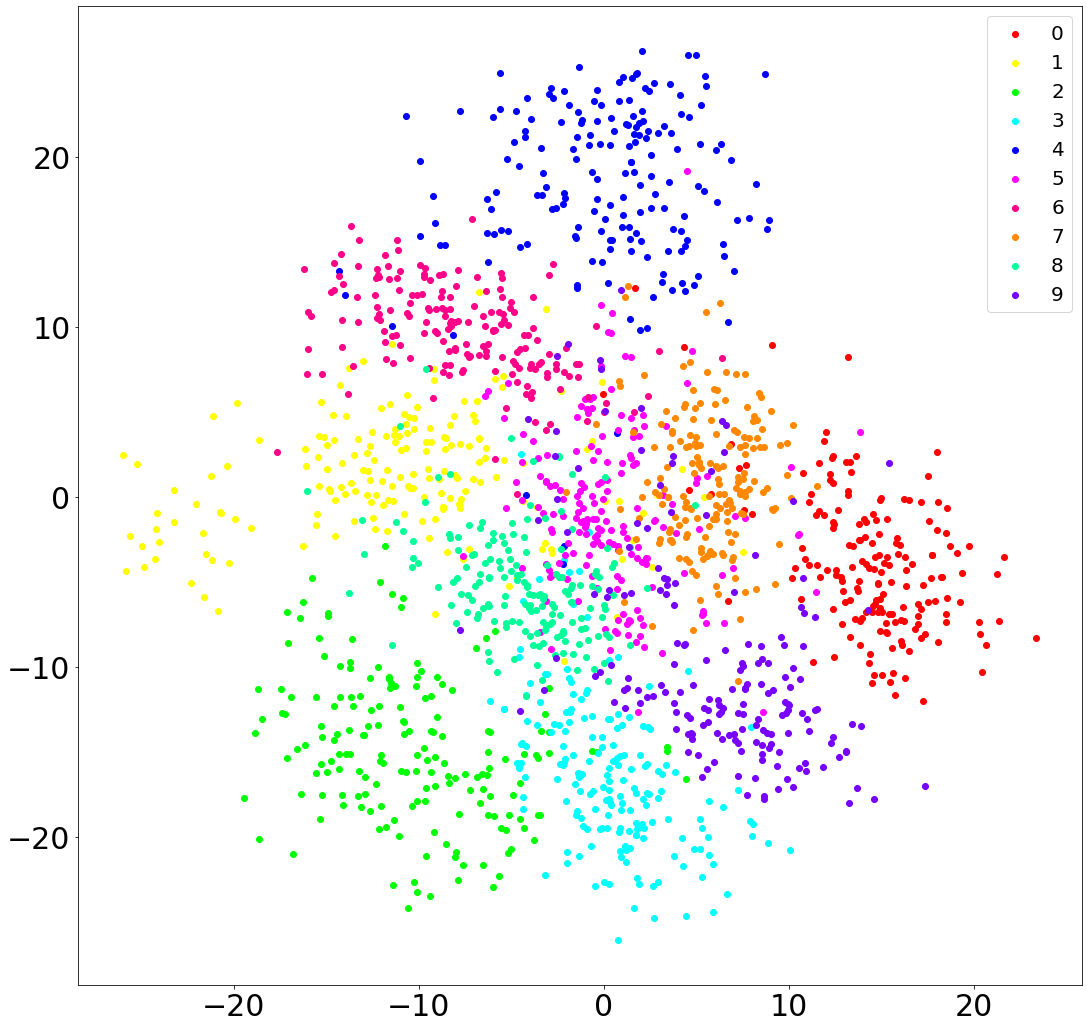

In [5]:
new_x=np.dot(x,A)
color=["#FF0000","#FFFF00","#00FF00","#00FFFF","#0000FF",
       "#FF00FF","#FF0088","#FF8800","#00FF99","#7700FF"]
plt.rcParams["figure.figsize"] = (18,18)
for i in range(0,10):
    BOOL=(y==i)
    plt.scatter(new_x[BOOL,0],new_x[BOOL,1],c=color[i],label=i)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)
plt.show()